## Observations and Insights 

Three Observations:
    1. The placebo, Stelasyn, and Naftisol had a close relation in the mean size of the tumor volume on the mice.
    2. Ceftamin and Infubinol had a close relation in the mean size of the tumor volume on the mice.
    3. Greater the weight of the mouse the more likely chance the mouse has a bigger tumor volume.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Clean up column names
df = df.rename(columns={"Mouse ID": "Mouse_ID","Drug Regimen": "Drug_Regimen","Weight (g)":"Weight_Grams","Tumor Volume (mm3)":"Tumor_Volume_mm3","Metastatic Sites":"Metastatic_Sites" })

##If the index needs to be set at Mouse ID
#df.set_index('Mouse ID', inplace=True)



# Display the data table for preview
df.to_csv('MouseStudy.csv')
df
#print(df.head())

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_Grams,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
print(df['Mouse_ID'].nunique())

249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df.duplicated(subset=['Mouse_ID','Timepoint'])
duplicateMT = df.loc[duplicates == True]
duplicateMT

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_Grams,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# g989 is duplicated
clean_df=df[df['Mouse_ID']!='g989']
clean_df


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_Grams,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
print(clean_df['Mouse_ID'].nunique())


248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regStatTumorMean_df=clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].mean()
regStatTumorMean_df=pd.DataFrame(regStatTumorMean_df)
regStatTumorMean_df=regStatTumorMean_df.rename(columns={"Tumor_Volume_mm3":"Mean"})
regStatTumorMedian_df=clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].median()
regStatTumorMedian_df=pd.DataFrame(regStatTumorMedian_df)
regStatTumorMedian_df=regStatTumorMedian_df.rename(columns={"Tumor_Volume_mm3":"Median"})
regStatTumorVariance_df=clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].var()
regStatTumorVariance_df=pd.DataFrame(regStatTumorVariance_df)
regStatTumorVariance_df=regStatTumorVariance_df.rename(columns={"Tumor_Volume_mm3":"Variance"})
regStatTumorStd_df=clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].std()
regStatTumorStd_df=pd.DataFrame(regStatTumorStd_df)
regStatTumorStd_df=regStatTumorStd_df.rename(columns={"Tumor_Volume_mm3":"Standard_Deviation"})
regStatTumorSem_df=clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].sem()
regStatTumorSem_df=pd.DataFrame(regStatTumorSem_df)
regStatTumorSem_df=regStatTumorSem_df.rename(columns={"Tumor_Volume_mm3":"SEM"})

mean_Median=regStatTumorMean_df.merge(regStatTumorMedian_df, how='inner', on='Drug_Regimen')
var_add=mean_Median.merge(regStatTumorVariance_df, how='inner', on='Drug_Regimen')
std_add=var_add.merge(regStatTumorStd_df, how='inner', on='Drug_Regimen')
tumor_Volume_Stats=std_add.merge(regStatTumorSem_df, how='inner', on='Drug_Regimen')
tumor_Volume_Stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].agg(['mean', 'median','var','std','sem'])



,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

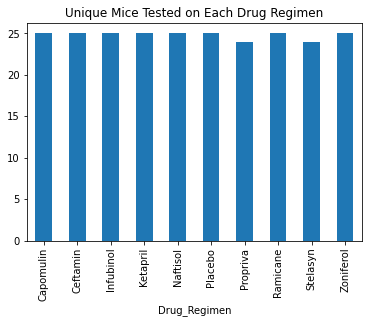

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_mouse=clean_df[['Drug_Regimen', 'Mouse_ID']].drop_duplicates()
drug_mouse.groupby('Drug_Regimen').size().plot(kind='bar', title="Unique Mice Tested on Each Drug Regimen")


plt.savefig('Images/barChart.png',bbox_inches='tight',dpi=100)



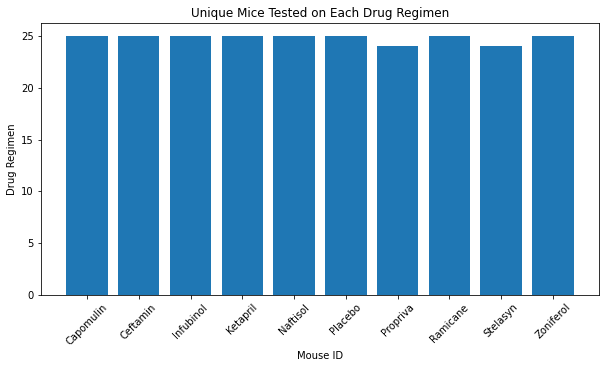

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_mouse=clean_df[['Mouse_ID', 'Drug_Regimen']].drop_duplicates()
count_df=drug_mouse.groupby('Drug_Regimen').size()
X=count_df.index
Y=count_df.values
# plt.bar(x, height)
plt.figure(figsize=(10,5))
plt.bar(X,Y)
plt.title("Unique Mice Tested on Each Drug Regimen")
plt.xlabel('Mouse ID')
plt.ylabel('Drug Regimen')
plt.xticks(rotation=45)

plt.show()

plt.savefig('Images/barChartPyplot.png',bbox_inches='tight',dpi=100)

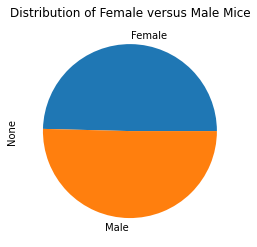

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

distribution_gender=clean_df[['Sex', 'Mouse_ID']].drop_duplicates()
distribution_gender.groupby('Sex').size().plot(kind='pie', title="Distribution of Female versus Male Mice")

plt.savefig('Images/piePlotPanda.png',bbox_inches='tight',dpi=100)

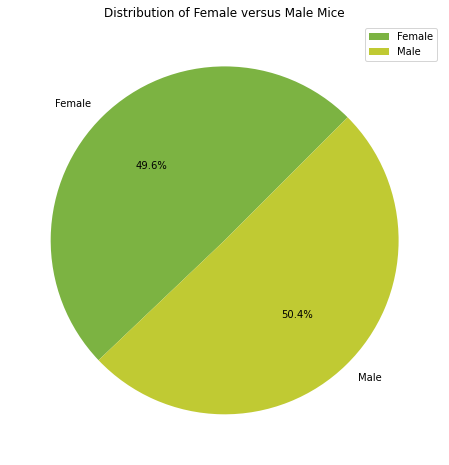

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#distribution size
# distribution_gender=clean_df[['Sex', 'Mouse_ID']].drop_duplicates()
# distribution_df=distribution_gender.groupby('Sex').size()
# distribution_df

plt.figure(figsize=(8,8))
area = [123,125]
label = ['Female' , 'Male']
color = ['#7CB342','#C0CA33']
plt.title("Distribution of Female versus Male Mice")
plt.pie (area , labels= label , colors= color , startangle=45 ,autopct='%1.1f%%')
plt.legend()
plt.show()


plt.savefig('Images/piePlotPyplot.png',bbox_inches='tight',dpi=100)

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_Vol=clean_df[['Mouse_ID', 'Drug_Regimen','Tumor_Volume_mm3','Timepoint']].drop_duplicates()
vol_df=final_Vol.loc[final_Vol.groupby('Mouse_ID').Timepoint.idxmax()].set_index('Drug_Regimen')
capomulin_drug_df=vol_df.loc[("Capomulin"),:]
ceftamin_drug_df=vol_df.loc[("Ceftamin"),:]
infubinol_drug_df=vol_df.loc[("Infubinol"),:]
Ramicane_drug_df=vol_df.loc[("Ramicane"),:]
data_Collect = capomulin_drug_df.append(ceftamin_drug_df) 
collect_DrugData = data_Collect.append(infubinol_drug_df)
final_4Drug = collect_DrugData.append(Ramicane_drug_df)
final_4Drug



,Mouse_ID,Tumor_Volume_mm3,Timepoint
Drug_Regimen,,,
Capomulin,b128,38.982878,45
Capomulin,b742,38.939633,45
Capomulin,f966,30.485985,20
Capomulin,g288,37.074024,45
Capomulin,g316,40.159220,45
...,...,...,...
Ramicane,s508,30.276232,45
Ramicane,u196,40.667713,45
Ramicane,w678,43.166373,5


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_Regimen = ["Capomulin","Ceftamin","Infubinol","Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_VolData=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_4Drug['Tumor_Volume_mm3'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume is: {upperq}")
print(f"The interquartile range of Final Tumor Volume is: {iqr}")
print(f"The the median of Final Tumor Volume is: {quartiles[0.5]} ")
 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Tumor = final_4Drug.loc[(final_4Drug['Tumor_Volume_mm3'] < lower_bound) | (final_4Drug['Tumor_Volume_mm3'] > upper_bound)]
outlier_Tumor
    

The lower quartile of Final Tumor Volume is: 37.187743802499995
The upper quartile of Final Tumor Volume is: 59.930261755000004
The interquartile range of Final Tumor Volume is: 22.74251795250001
The the median of Final Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse_ID,Tumor_Volume_mm3,Timepoint
Drug_Regimen,,,


NameError: name 'data' is not defined

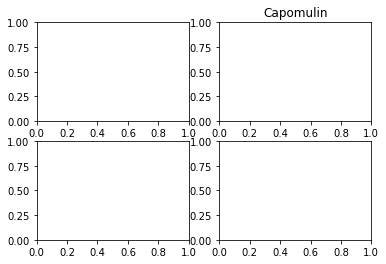

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



fig1, ax1 = plt.subplots(2,2)
ax1[0, 1].set_title("Capomulin") 
ax1[0, 1].boxplot(data)
plt.show() 

# fig2, ax2 = plt.subplots(2,1)
# ax2[0, 1].set_title("Ceftamin") 
# ax2[0, 1].boxplot(data)
# plt.show() 

## Line and Scatter Plots

In [22]:
capomulin_df=clean_df[clean_df['Drug_Regimen']=='Capomulin']
capomulin_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_Grams,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


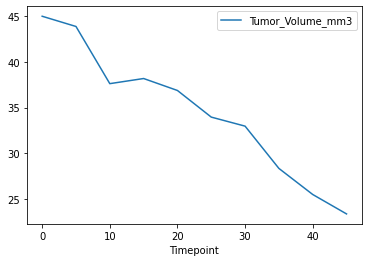

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
selection='s185'
one_mouse=clean_df[clean_df['Mouse_ID']==selection][['Tumor_Volume_mm3', 'Timepoint']]
one_mouse.plot(x='Timepoint')
# clean_df[clean_df['Mouse_ID']==selection].plot(x='Timepoint', y='Tumor_Volume_mm3')
plt.savefig('Images/linePlot.png',bbox_inches='tight',dpi=100)

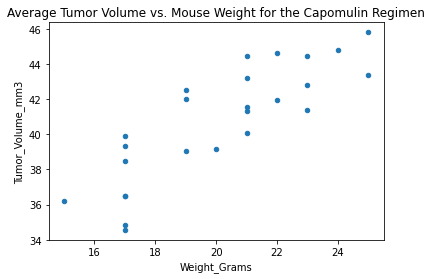

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df=clean_df[clean_df['Drug_Regimen']=='Capomulin']
weight_volume=cap_df.groupby('Mouse_ID').mean()[['Weight_Grams', 'Tumor_Volume_mm3']]
weight_volume.plot(kind='scatter', x='Weight_Grams', y='Tumor_Volume_mm3')
#plt.scatter(capomulin_df.iloc[:,5],capomulin_df.iloc[:,7])
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
#plt.xlabel('mouse weight')
#plt.ylabel('average tumor volume')
#plt.show()
plt.savefig('Images/scatterPlot.png',bbox_inches='tight',dpi=100)

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
cap_df=clean_df[clean_df['Drug_Regimen']=='Capomulin']
weight_volume=cap_df.groupby('Mouse_ID').mean()[['Weight_Grams', 'Tumor_Volume_mm3']]
display(weight_volume)
weight=weight_volume['Weight_Grams']
# weight = capomulin_df.iloc[:,5]
tumor=weight_volume['Tumor_Volume_mm3']
# tumor = capomulin_df.iloc[:,7]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


,Weight_Grams,Tumor_Volume_mm3
Mouse_ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


The correlation between both factors is 0.84


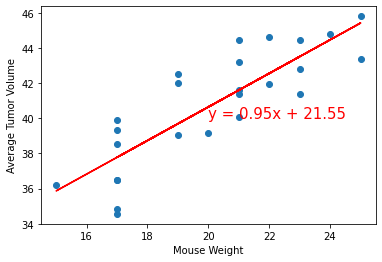

<Figure size 432x288 with 0 Axes>

In [27]:
cap_df=clean_df[clean_df['Drug_Regimen']=='Capomulin']
weight_volume=cap_df.groupby('Mouse_ID').mean()[['Weight_Grams', 'Tumor_Volume_mm3']]
x_values = weight_volume['Weight_Grams']
y_values = weight_volume['Tumor_Volume_mm3']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
plt.savefig('Images/regressionPlot.png',bbox_inches='tight',dpi=100)